##Import Necessary Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

##Load and Explore the CIFAR-10 Dataset

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
Train data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


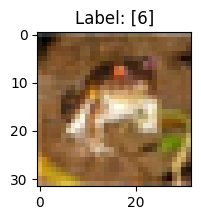

In [2]:
# Load the CIFAR-10 dataset directly using TensorFlow/Keras
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print dataset shape
print(f'Train data shape: {x_train.shape}')
print(f'Test data shape: {x_test.shape}')

# Display a sample image
plt.figure(figsize=(2,2))
plt.imshow(x_train[0])
plt.title(f'Label: {y_train[0]}')
plt.show()

##Preprocess the Data





In [3]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Define the Convolutional Neural Network (CNN) Model

In [4]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##Train the Model

In [5]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=64)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.2948 - loss: 1.9048 - val_accuracy: 0.5147 - val_loss: 1.3601
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4988 - loss: 1.3990 - val_accuracy: 0.5821 - val_loss: 1.1903
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5537 - loss: 1.2397 - val_accuracy: 0.6176 - val_loss: 1.0918
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5886 - loss: 1.1593 - val_accuracy: 0.6270 - val_loss: 1.0629
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6194 - loss: 1.0785 - val_accuracy: 0.6452 - val_loss: 1.0124
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6386 - loss: 1.0302 - val_accuracy: 0.6536 - val_loss: 0.9940
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6566 - loss: 0.9760 - val_accuracy: 0.6701 - val_loss: 0.9474
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6717 - loss: 0.9326 - val_accuracy: 0.

##Evaluate the Model

In [6]:
# Evaluate the baseline model
model_test_loss, model_test_accuracy = model.evaluate(x_test, y_test)
print(f'Baseline Test accuracy: {model_test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6915 - loss: 0.9038
Baseline Test accuracy: 0.6912999749183655


##Visualize Training History




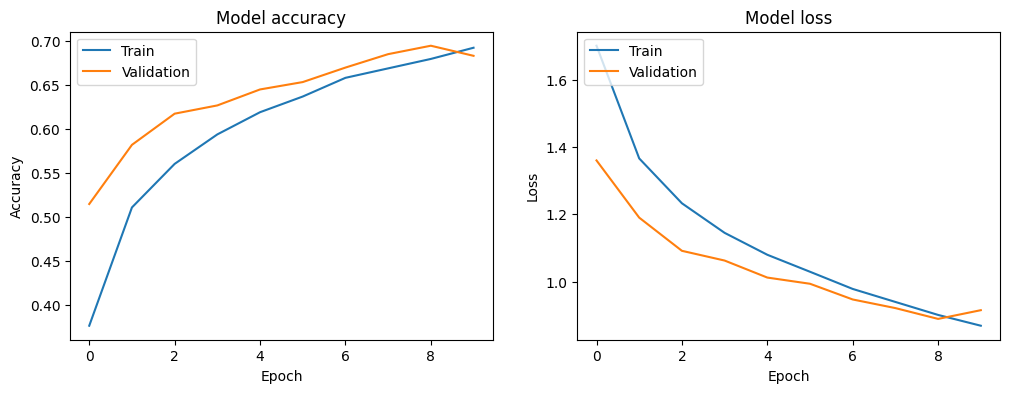

In [7]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##Advanced Architectures (VGG, ResNet)


In [8]:
def build_vgg_like_model():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build and train VGG-like model
vgg_like_model = build_vgg_like_model()
vgg_like_history = vgg_like_model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=64)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.3374 - loss: 1.7808 - val_accuracy: 0.5713 - val_loss: 1.1855
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5894 - loss: 1.1522 - val_accuracy: 0.6446 - val_loss: 1.0002
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6727 - loss: 0.9244 - val_accuracy: 0.7048 - val_loss: 0.8341
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7318 - loss: 0.7719 - val_accuracy: 0.7411 - val_loss: 0.7453
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7707 - loss: 0.6573 - val_accuracy: 0.7448 - val_loss: 0.7338
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7980 - loss: 0.5783 - val_accuracy: 0.7659 - val_loss: 0.6866
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8282 - loss: 0.4899 - val_accuracy: 0.7675 - val_loss: 0.6913
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8557 - loss: 0.4110 - val_accurac

##Evaluate and Visualize VGG-like Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7763 - loss: 0.7481
VGG-like Test accuracy: 0.7692999839782715


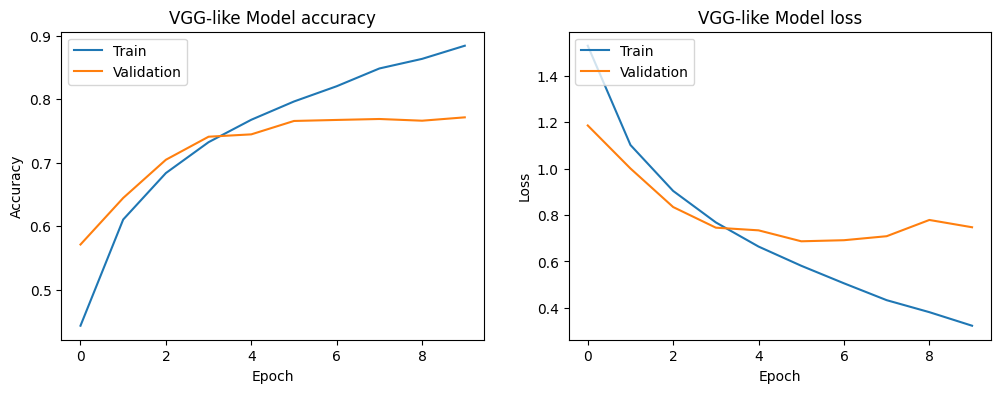

In [9]:
# Evaluate the VGG-like model
vgg_like_test_loss, vgg_like_test_accuracy = vgg_like_model.evaluate(x_test, y_test)
print(f'VGG-like Test accuracy: {vgg_like_test_accuracy}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(vgg_like_history.history['accuracy'])
plt.plot(vgg_like_history.history['val_accuracy'])
plt.title('VGG-like Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(vgg_like_history.history['loss'])
plt.plot(vgg_like_history.history['val_loss'])
plt.title('VGG-like Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#Data Augmentation

##Define Data Augmentation

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Fit the data generator
datagen.fit(x_train)

##Train the Model with Data Augmentation

In [11]:
# Build the baseline model again for comparison
augmented_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
augmented_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation
augmented_history = augmented_model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.2457 - loss: 2.0096 - val_accuracy: 0.4433 - val_loss: 1.5739
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 42ms/step - accuracy: 0.3823 - loss: 1.6849 - val_accuracy: 0.5193 - val_loss: 1.3584
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.4328 - loss: 1.5651 - val_accuracy: 0.5329 - val_loss: 1.3121
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.4547 - loss: 1.5060 - val_accuracy: 0.5732 - val_loss: 1.1969
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.4786 - loss: 1.4508 - val_accuracy: 0.5764 - val_loss: 1.1885
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.4908 - loss: 1.4183 - val_accuracy: 0.5807 - val_loss: 1.1813
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.5052 - loss: 1.3837 - val_accuracy: 0.5862 - val_loss: 1.1590
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - accuracy: 0.5156 - loss: 1.3679 - val_accurac

##Evaluate and Visualize Data Augmentation Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6371 - loss: 1.0296
Augmented Test accuracy: 0.6322000026702881


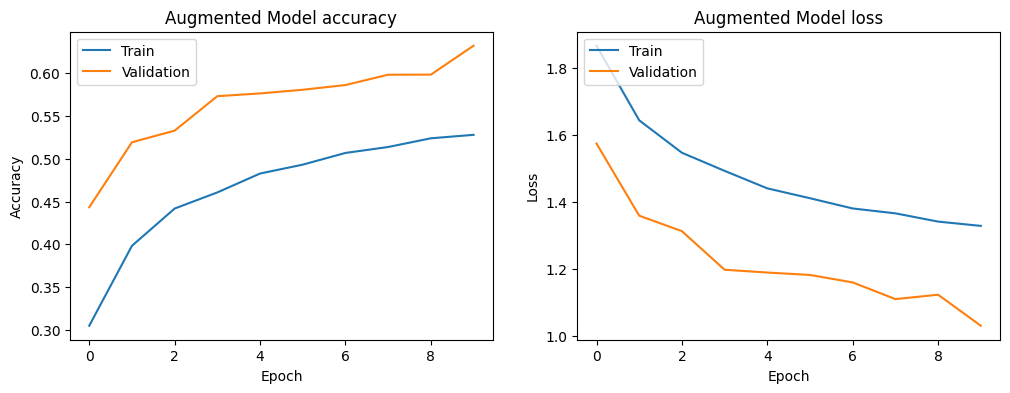

In [12]:
# Evaluate the augmented model
augmented_test_loss, augmented_test_accuracy = augmented_model.evaluate(x_test, y_test)
print(f'Augmented Test accuracy: {augmented_test_accuracy}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(augmented_history.history['accuracy'])
plt.plot(augmented_history.history['val_accuracy'])
plt.title('Augmented Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(augmented_history.history['loss'])
plt.plot(augmented_history.history['val_loss'])
plt.title('Augmented Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#Hyperparameter Tuning

##Tune Hyperparameters

In [13]:
# Build the model again for comparison
tuned_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model with a different learning rate
tuned_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with a different batch size
tuned_history = tuned_model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=128)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.2680 - loss: 1.9831 - val_accuracy: 0.4896 - val_loss: 1.4383
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4653 - loss: 1.4830 - val_accuracy: 0.5538 - val_loss: 1.2501
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5235 - loss: 1.3303 - val_accuracy: 0.5845 - val_loss: 1.1893
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5658 - loss: 1.2302 - val_accuracy: 0.6118 - val_loss: 1.0982
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5896 - loss: 1.1573 - val_accuracy: 0.6192 - val_loss: 1.0673
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6137 - loss: 1.1011 - val_accuracy: 0.6424 - val_loss: 1.0135
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6289 - loss: 1.0603 - val_accuracy: 0.6474 - val_loss: 1.0033
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6458 - loss: 1.0049 - val_accuracy: 0

##Evaluate and Visualize Tuned Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6851 - loss: 0.9052
Tuned Test accuracy: 0.6841999888420105


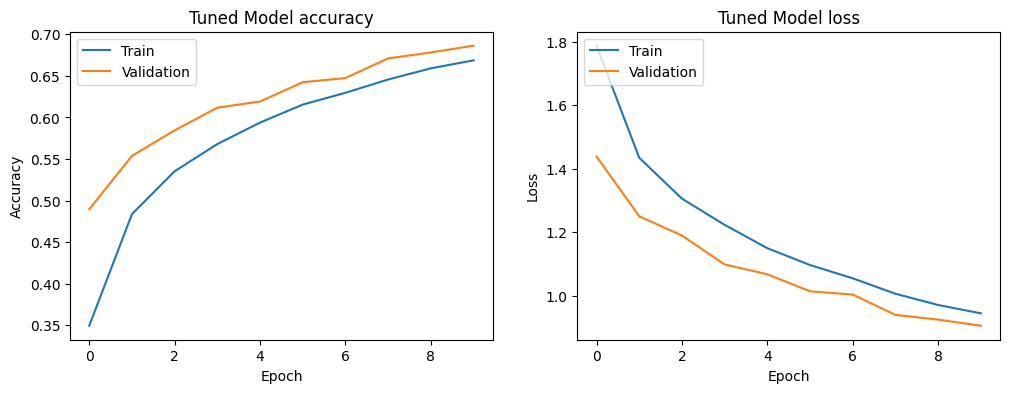

In [14]:
# Evaluate the tuned model
tuned_test_loss, tuned_test_accuracy = tuned_model.evaluate(x_test, y_test)
print(f'Tuned Test accuracy: {tuned_test_accuracy}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(tuned_history.history['accuracy'])
plt.plot(tuned_history.history['val_accuracy'])
plt.title('Tuned Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(tuned_history.history['loss'])
plt.plot(tuned_history.history['val_loss'])
plt.title('Tuned Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##ResNet-like Model

In [16]:
from tensorflow.keras.layers import BatchNormalization, Add

def build_resnet_like_model():
  def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x

    y = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    y = BatchNormalization()(y)
    y = tf.keras.activations.relu(y)

    y = Conv2D(filters, kernel_size, padding='same')(y)
    y = BatchNormalization()(y)

    if stride != 1 or x.shape[-1] != filters:
      shortcut = Conv2D(filters, (1, 1), strides=stride, padding='same')(x)
      shortcut = BatchNormalization()(shortcut)

    y = Add()([shortcut, y])
    y = tf.keras.activations.relu(y)
    return y

  inputs = tf.keras.Input(shape=(32, 32, 3))
  x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
  x = MaxPooling2D((2, 2))(x)

  x = residual_block(x, 64)
  x = residual_block(x, 64)

  x = residual_block(x, 128, stride=2)
  x = residual_block(x, 128)

  x = Flatten()(x)
  x = Dense(256, activation='relu')(x)
  outputs = Dense(10, activation='softmax')(x)

  model = tf.keras.Model(inputs=inputs, outputs=outputs)
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# Build and train ResNet-like model
resnet_like_model = build_resnet_like_model()
resnet_like_history = resnet_like_model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=64)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.2998 - loss: 2.8037 - val_accuracy: 0.4883 - val_loss: 1.4777
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.5908 - loss: 1.1459 - val_accuracy: 0.4940 - val_loss: 1.4843
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6942 - loss: 0.8698 - val_accuracy: 0.6377 - val_loss: 1.0494
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7560 - loss: 0.6974 - val_accuracy: 0.5523 - val_loss: 1.4341
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8012 - loss: 0.5642 - val_accuracy: 0.6975 - val_loss: 0.8829
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8379 - loss: 0.4672 - val_accuracy: 0.6571 - val_loss: 1.0890
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8665 - loss: 0.3783 - val_accuracy: 0.7325 - val_loss: 0.8274
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8916 - loss: 0.3078 - val

##Evaluate and Visualize Tuned Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7321 - loss: 1.1356
ResNet-like Test accuracy: 0.7228999733924866


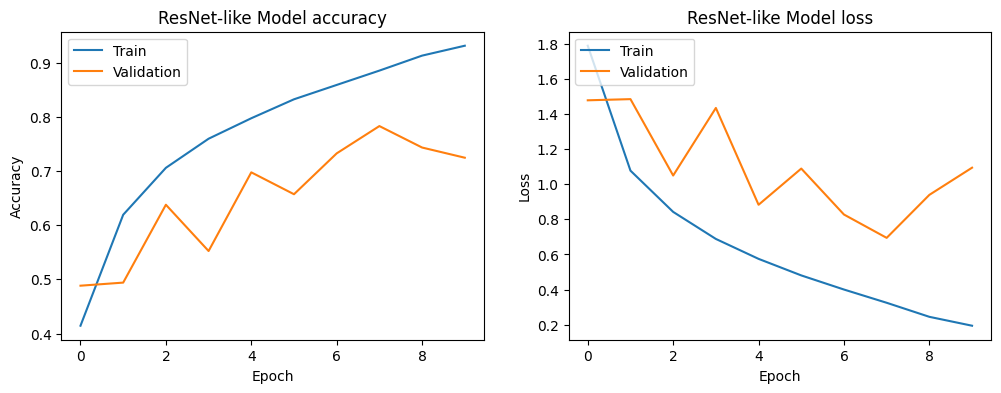

In [17]:
# Evaluate the ResNet-like model
resnet_like_test_loss, resnet_like_test_accuracy = resnet_like_model.evaluate(x_test, y_test)
print(f'ResNet-like Test accuracy: {resnet_like_test_accuracy}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(resnet_like_history.history['accuracy'])
plt.plot(resnet_like_history.history['val_accuracy'])
plt.title('ResNet-like Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(resnet_like_history.history['loss'])
plt.plot(resnet_like_history.history['val_loss'])
plt.title('ResNet-like Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##VGG16 transfer learning model

In [18]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input

def build_vgg16_transfer_model():
  # Load VGG16 pre-trained on ImageNet without the top classification layers
  base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(32, 32, 3)))

  # Freeze the base model layers
  base_model.trainable = False

  # Add new classification layers on top
  model = Sequential([
      base_model,
      Flatten(),
      Dense(256, activation='relu'),
      Dropout(0.5),
      Dense(10, activation='softmax')
  ])

  # Compile the model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# Build and train VGG16 transfer learning model
vgg16_transfer_model = build_vgg16_transfer_model()
vgg16_transfer_history = vgg16_transfer_model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=64)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.3798 - loss: 1.7530 - val_accuracy: 0.5485 - val_loss: 1.2947
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.5298 - loss: 1.3442 - val_accuracy: 0.5719 - val_loss: 1.2300
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.5538 - loss: 1.2681 - val_accuracy: 0.5801 - val_loss: 1.1995
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5723 - loss: 1.2206 - val_accuracy: 0.5917 - val_loss: 1.1712
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5809 - loss: 1.1964 - val_accuracy: 0.5995 - val_loss: 1.1586
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.5841 - loss: 1.1839 - val_accuracy: 0.6003 - val_loss: 1.1431
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5995 - loss: 1.1466 - val_accuracy: 0.6062 - val_loss: 1.1369
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s

##Evaluate and Visualize Tuned Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6076 - loss: 1.1275
VGG16 Transfer Learning Test accuracy: 0.6055999994277954


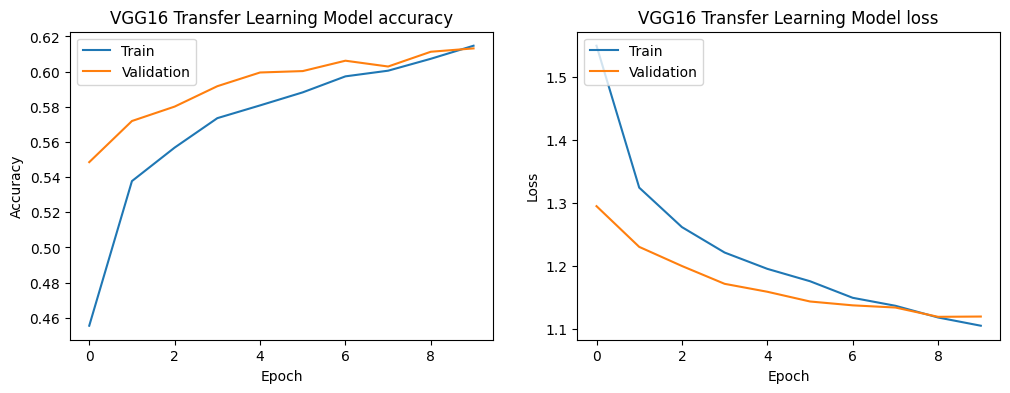

In [19]:
# Evaluate the VGG16 transfer learning model
vgg16_transfer_test_loss, vgg16_transfer_test_accuracy = vgg16_transfer_model.evaluate(x_test, y_test)
print(f'VGG16 Transfer Learning Test accuracy: {vgg16_transfer_test_accuracy}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(vgg16_transfer_history.history['accuracy'])
plt.plot(vgg16_transfer_history.history['val_accuracy'])
plt.title('VGG16 Transfer Learning Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(vgg16_transfer_history.history['loss'])
plt.plot(vgg16_transfer_history.history['val_loss'])
plt.title('VGG16 Transfer Learning Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

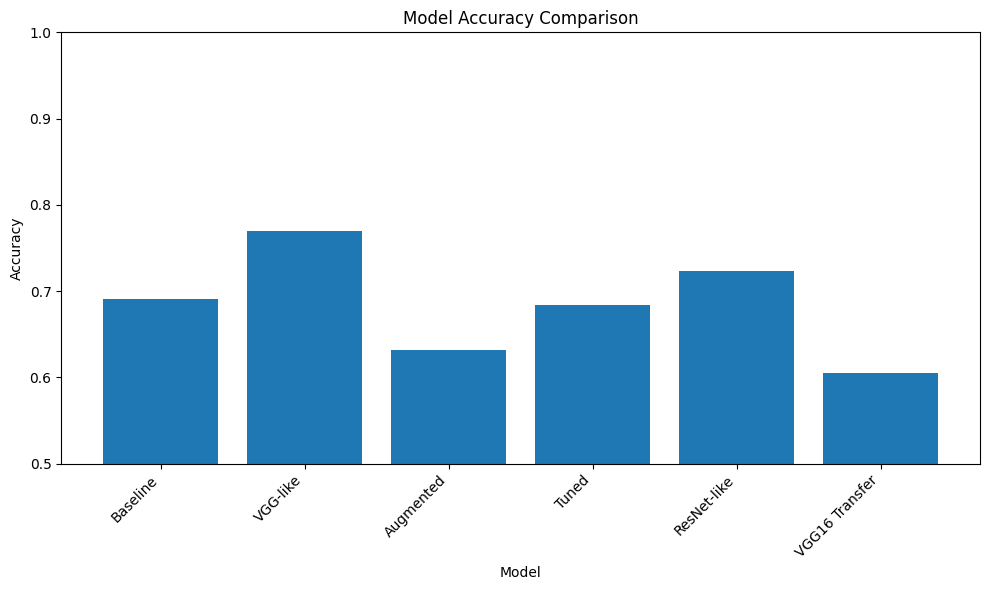

In [20]:
# Comparison of Model Performance
models = ['Baseline', 'VGG-like', 'Augmented', 'Tuned', 'ResNet-like', 'VGG16 Transfer']
accuracies = [model_test_accuracy, vgg_like_test_accuracy, augmented_test_accuracy, tuned_test_accuracy, resnet_like_test_accuracy, vgg16_transfer_test_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0.5, 1.0)  # Set y-axis limits for better visualization
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [21]:
import pandas as pd
# Comparison of Model Performance
models = ['Baseline', 'VGG-like', 'Augmented', 'Tuned', 'ResNet-like', 'VGG16 Transfer']
accuracies = [model_test_accuracy, vgg_like_test_accuracy, augmented_test_accuracy, tuned_test_accuracy, resnet_like_test_accuracy, vgg16_transfer_test_accuracy]

df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
df


,Model,Accuracy
0,Baseline,0.6913
1,VGG-like,0.7693
2,Augmented,0.6322
3,Tuned,0.6842
4,ResNet-like,0.7229
5,VGG16 Transfer,0.6056
